In [1]:
from tensorflow import keras

In [2]:
(train_images, train_targets), (test_images, test_targets) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [3]:
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
import numpy as np
np.unique(train_targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

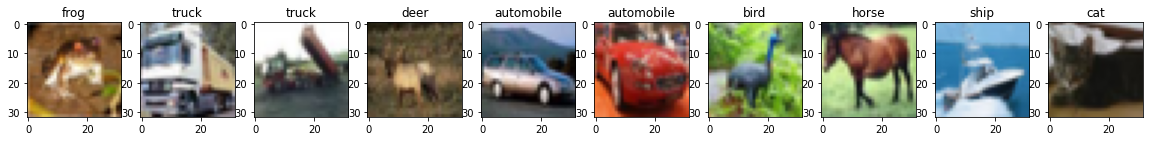

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_targets[i][0]])
plt.show()

In [7]:
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0

In [8]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_targets,
                                                                      test_size=0.2, random_state=0)

In [9]:
from keras import models, layers

def make_cnn_model():
  model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

In [10]:
cnn_model = make_cnn_model()
cnn_model.summary()  # Layer와 학습 파라미터 개수 확인하기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = cnn_model.fit(train_scaled, train_target, epochs=30,
                        validation_data=(val_scaled, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
1250/1250 [==============================] - 24s 7ms/step - loss: 1.7442 - accuracy: 0.3561 - val_loss: 1.2926 - val_accuracy: 0.5336
Epoch 2/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3205 - accuracy: 0.5211 - val_loss: 1.0632 - val_accuracy: 0.6160
Epoch 3/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1544 - accuracy: 0.5853 - val_loss: 1.0397 - val_accuracy: 0.6338
Epoch 4/30
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0594 - accuracy: 0.6252 - val_loss: 0.8732 - val_accuracy: 0.6938
Epoch 5/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9728 - accuracy: 0.6579 - val_loss: 0.8345 - val_accuracy: 0.7022
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9188 - accuracy: 0.6779 - val_loss: 0.7665 - val_accuracy: 0.7311
Epoch 7/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8834 - accuracy: 0.6920 - val_loss: 0.7898 - val_accurac

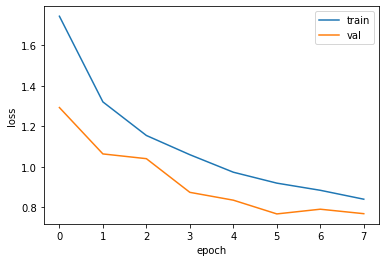

In [13]:
import matplotlib.pyplot as plt

def make_plot():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

In [14]:
cnn_model.evaluate(test_scaled, test_targets)

313/313 [==============================] - 1s 3ms/step - loss: 0.7788 - accuracy: 0.7291


[0.7788317203521729, 0.7290999889373779]

In [15]:
predicted_result = cnn_model.predict(test_scaled)
predicted_result[:5]

array([[3.6720815e-03, 4.4556687e-04, 1.7644521e-02, 6.3625479e-01,
        4.1641933e-03, 3.0315369e-01, 2.7150171e-02, 4.1401079e-03,
        2.0171260e-03, 1.3577259e-03],
       [1.9712973e-02, 5.2279361e-02, 1.5175974e-07, 3.7376802e-07,
        6.1981926e-09, 7.0726164e-10, 9.7235633e-09, 2.2895214e-10,
        9.2626256e-01, 1.7444636e-03],
       [1.3214561e-01, 3.2158917e-01, 5.2465191e-03, 9.1829486e-03,
        2.5153635e-03, 1.0951805e-03, 5.0725969e-03, 5.0282187e-04,
        3.2949191e-01, 1.9315788e-01],
       [3.3071363e-01, 1.3826744e-01, 7.8116059e-03, 5.8016968e-03,
        1.9720462e-03, 2.6664397e-04, 5.2417436e-04, 1.1900506e-04,
        4.9955216e-01, 1.4971659e-02],
       [3.3896008e-08, 7.0323591e-09, 4.9357130e-03, 9.1221568e-04,
        2.0630748e-03, 1.5191527e-05, 9.9207377e-01, 4.8405164e-09,
        2.9524203e-09, 6.2511524e-10]], dtype=float32)

In [16]:
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:5]

array([3, 8, 8, 8, 6])

In [17]:
wrong_result = []
for i in range(len(test_scaled)):
  if predicted_labels[i] != test_targets[i]:
    wrong_result.append(i)
print(len(wrong_result))

2709


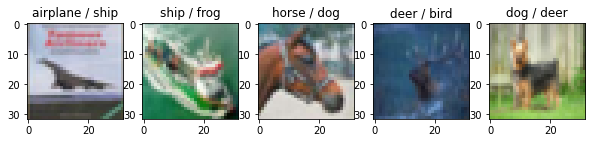

In [18]:
plt.figure(figsize=(10, 10))

for idx, wrong_idx in enumerate(wrong_result[:5]):
  plt.subplot(1, 5, idx+1)
  plt.imshow(test_images[wrong_idx])
  plt.title(class_names[test_targets[wrong_idx][0]] + ' / ' + class_names[predicted_labels[wrong_idx]])
plt.show()